# Clone the repo
### (For use in colab)
[![Open in Colaboratory](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rizerphe/dev_datasets_analysis_project/blob/main/notebook.ipynb)

In [ ]:
!git clone --recursive https://github.com/rizerphe/dev_datasets_analysis_project.git
%cd dev_datasets_analysis_project
!python download_stackoverflow.py

# Load the dataset

In [77]:
import pandas as pd
import numpy as np

In [27]:
import matplotlib.pyplot as plt

In [26]:
import math

In [ ]:
# Load the data

dec_2021 = pd.read_csv('./csv/salaries/2021_dec_raw.csv', delimiter=';')
dec_2021_devs = dec_2021[dec_2021['Оберіть вашу посаду'] == 'Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)']
dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'] = dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'].astype(int)
dec_2021_devs = dec_2021_devs.dropna(subset=['Зарплата у $$$ за місяць, лише ставка після сплати податків'])

In [ ]:
dec_2021.columns

In [ ]:
dec_2021_devs

# Середня зарплата програміста

In [55]:
dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean()

3463.350156152405

In [61]:
# Salary depending on region
dec_2021_devs.set_index('Де ви мешкаєте?').groupby('Де ви мешкаєте?')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean().sort_values(ascending=False)

Де ви мешкаєте?
Київ                3822.633294
Львів               3549.886143
Одеса               3451.226829
Дніпро              3338.937639
Харків              3330.210780
Вінниця             3067.253219
Івано-Франківськ    3049.858896
Маріуполь           2959.444444
Ужгород             2894.024390
Тернопіль           2846.272727
Чернігів            2810.612245
Інше                2805.766055
Суми                2766.200000
Херсон              2732.257143
Черкаси             2726.455696
Миколаїв            2681.216216
Житомир             2661.490566
Рівне               2660.916667
Запоріжжя           2645.476190
Хмельницький        2630.105263
Луцьк               2611.739130
Полтава             2590.833333
Чернівці            2396.902913
Кривий Ріг          2343.450000
Кропивницький       1791.818182
Name: Зарплата у $$$ за місяць, лише ставка після сплати податків, dtype: float64

In [62]:
dec_2021_devs['Де ви працюєте?'].value_counts()

Віддалено                               4709
Частково віддалено, частково в офісі    2190
В офісі                                  982
Name: Де ви працюєте?, dtype: int64

In [64]:
dec_2021_devs['Загальний стаж роботи в ІТ'].value_counts()

10 і більше років    1700
3 роки                870
5 років               869
4 роки                776
6 років               690
2 роки                605
7 років               522
1 рік                 408
8 років               404
1,5 року              338
Пів року              321
9 років               318
Менше як 3 місяці      94
3 місяці               90
Name: Загальний стаж роботи в ІТ, dtype: int64

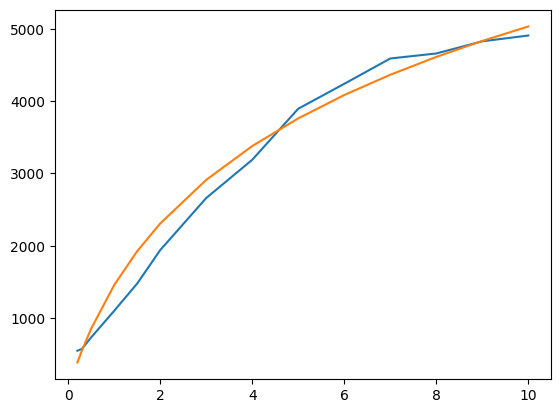

In [106]:
data = dec_2021_devs.groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean().sort_values()

index = [0.2, 0.3, 0.5, 1, 1.5] + list(range(2, 11))

sub = plt.subplot()
sub.plot(index, data)
sub.plot(index, [2100 * math.log(x + 1) for x in index])

In [93]:
def sort_by_criteria(criteria, threshold=None):
    index = [0.2, 0.3, 0.5, 1, 1.5] + list(range(2, 11))
    index_names = dec_2021_devs.groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean().sort_values().index
    index_dict = dict(zip(index_names, index))


    for key in sorted(dec_2021_devs[criteria].unique(), reverse=True, key=lambda key: sum(dec_2021_devs[criteria] == key)):
        data = dec_2021_devs[dec_2021_devs[criteria] == key].groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean()

        n = sum(dec_2021_devs[criteria] == key)
        print(f"{key} - {n} responses")

        if threshold is None or n > threshold:
            sub = plt.subplot()
            sorted_index = sorted(data.index, key=lambda x: index_dict[x])
            sub.plot(sorted(index_dict[x] for x in data.index), [data[x] for x in sorted_index])
            sub.plot(index, [2100 * math.log(x + 1) for x in index])
            plt.show()

Київ - 3376 responses


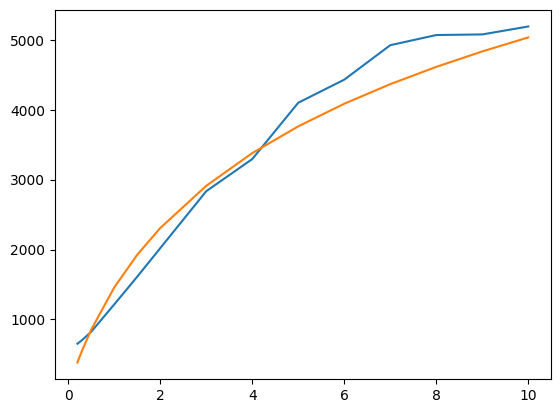

Львів - 1133 responses


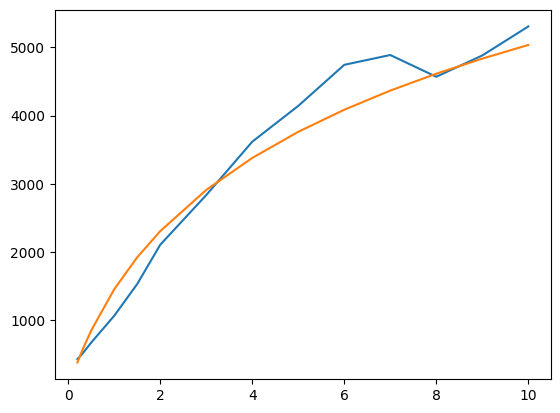

Харків - 1039 responses


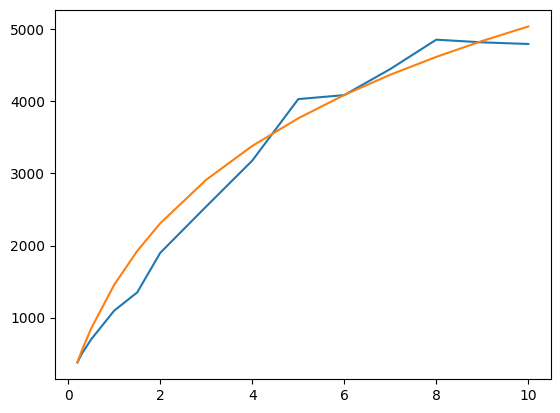

Дніпро - 449 responses


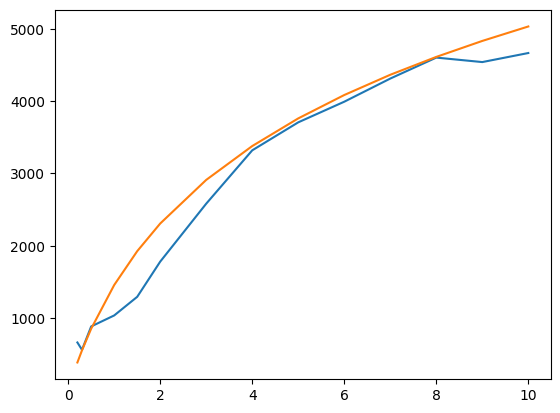

Одеса - 410 responses


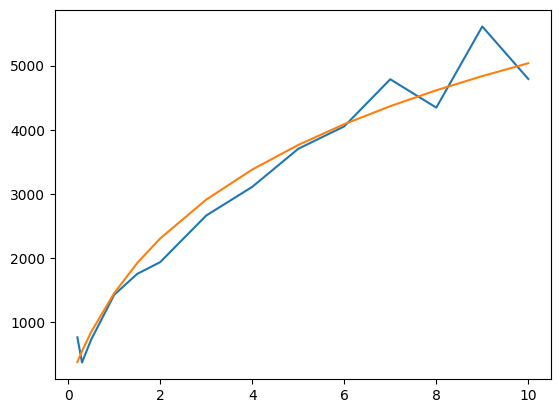

Вінниця - 233 responses
Інше - 218 responses
Івано-Франківськ - 163 responses
Запоріжжя - 105 responses
Чернівці - 103 responses
Тернопіль - 88 responses
Черкаси - 79 responses
Хмельницький - 76 responses
Миколаїв - 74 responses
Рівне - 60 responses
Полтава - 54 responses
Житомир - 53 responses
Суми - 50 responses
Чернігів - 49 responses
Луцьк - 46 responses
Ужгород - 41 responses
Херсон - 35 responses
Кропивницький - 33 responses
Кривий Ріг - 20 responses
Маріуполь - 18 responses


In [94]:
sort_by_criteria("Де ви мешкаєте?", 300)

JavaScript - 1541 responses


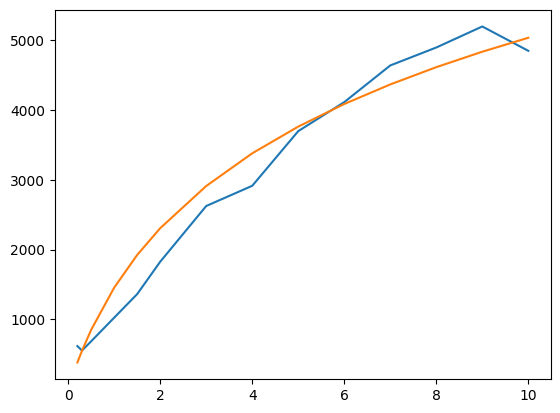

C# / .NET - 1225 responses


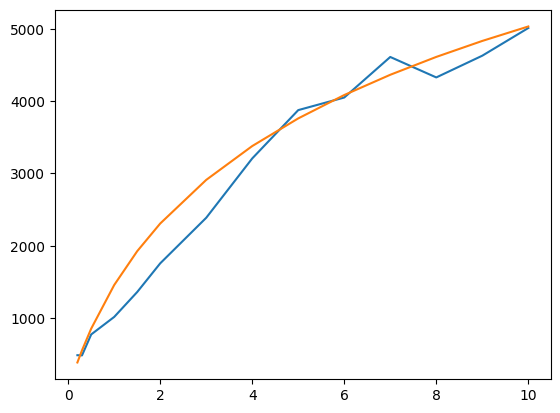

Java - 1191 responses


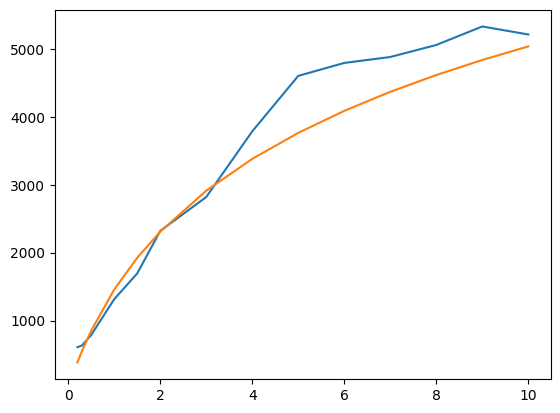

TypeScript - 868 responses


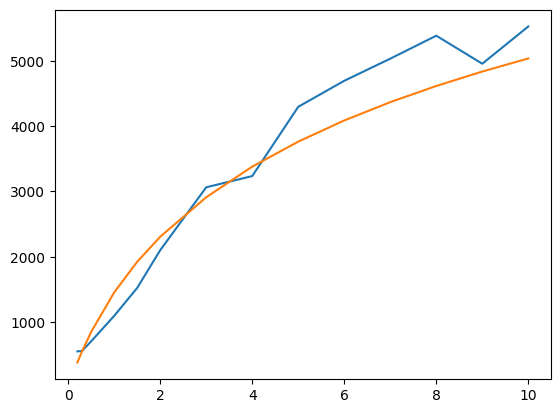

PHP - 867 responses


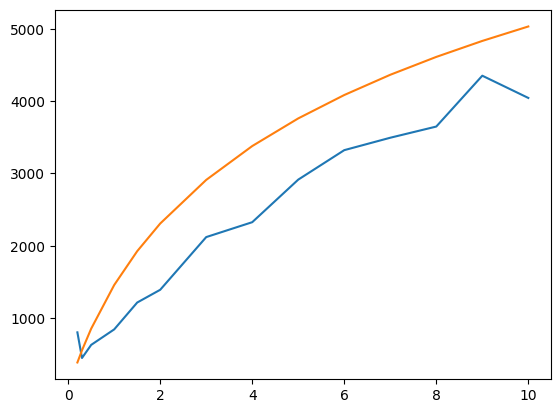

Python - 481 responses


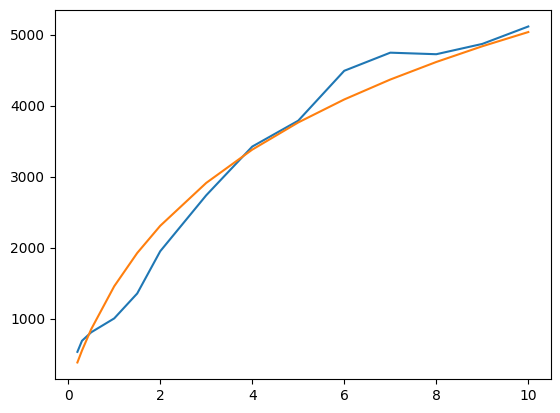

Kotlin - 287 responses
Swift - 284 responses
C++ - 274 responses
Ruby - 167 responses
Go - 151 responses
Dart - 86 responses
C - 78 responses
Scala - 66 responses
1С - 56 responses
Salesforce Apex - 53 responses
SQL - 46 responses
Інша мова - 34 responses
Мови розробки БД (PL/SQL, Transact-SQL) - 23 responses
Objective-C - 18 responses
Rust - 17 responses
Elixir - 11 responses
Не можу обрати одну основну мову - 10 responses
Clojure - 10 responses
Erlang - 8 responses
ABAP - 7 responses
Pascal/Delphi - 7 responses
Perl - 5 responses
Groovy - 5 responses
APL - 4 responses
Haskell - 3 responses
nan - 0 responses


In [95]:
sort_by_criteria("Основна мова програмування", 300)